# Working with OpenCV

## Covered in this notebook:
0. Opening an image
1. Inverted Images
2. Rescaling
3. Binarization
4. Noise Removal
5. Dilation and Erosion
6. Rotation / Desekwing
7. Removing Borders
8. Missing Borders


## 00: Opening an image

In [1]:
import os
os.chdir(r'C://Users/Omarm/Desktop/OCR')

In [2]:
import cv2

In [3]:
image_file = 'test1.png'
img = cv2.imread(image_file)

In [4]:
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#This method does not show the image inside the notebook, so we can use matplotlib instead

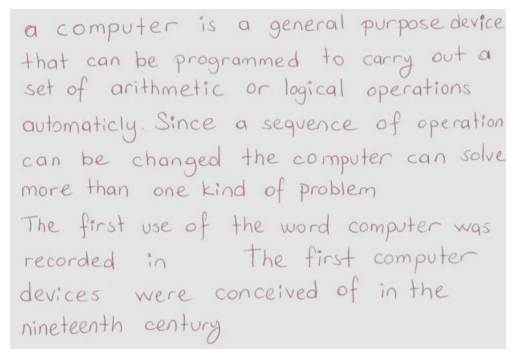

In [5]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(img)

In [6]:
def display(image_file):
    """
    This function is used to  display images in their actual size in the notebook
    """
    import matplotlib.pyplot as plt
    dpi = 80.                               #Dots per Inch
    img = plt.imread(image_file)            #Reads the image from the given path
    height, width = img.shape[:2]           #Get the image dimension
    figsize = height/dpi, width/dpi         #Calculate figure size
    plt.figure(figsize=figsize)             #Create a figure
    plt.axis('off')                         #Hide axes
    plt.imshow(img, cmap='gray')            #Display the image
    plt.show()                              #Renders the figure and displays the image inline

## 01: Inverted images

In [7]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite('temp/inverted.png', inverted_image)

True

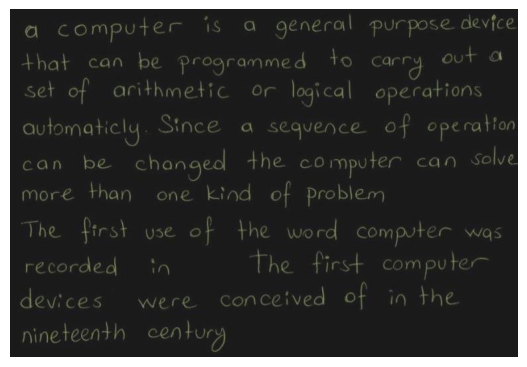

In [8]:
inverted_image_file = 'temp/inverted.png'
display(inverted_image_file)


## 02: Rescaling

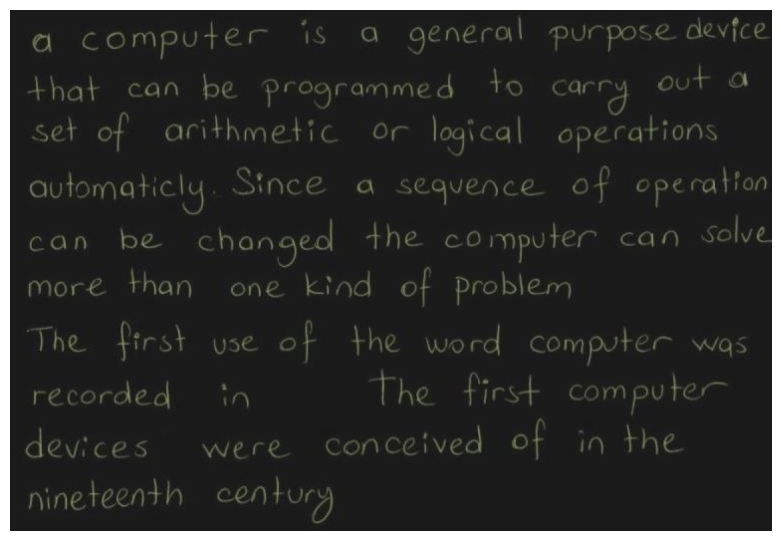

In [9]:
image = cv2.imread('temp/inverted.png')

# Scale the image to 150% of its original size
scaled_image = cv2.resize(image, None, fx= 1.5, fy=1.5, interpolation=cv2.INTER_AREA)

# Save and display the result
cv2.imwrite('temp/scaled_image.jpg', scaled_image)
display('temp/scaled_image.jpg')

## 03: Binarization

In [10]:
def greyscale(image):
    """
    A function that converts an image to a greyscale using opencv
    """
    import cv2
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [11]:
grey_image = greyscale(img)
cv2.imwrite('temp/grey.png', grey_image)

True

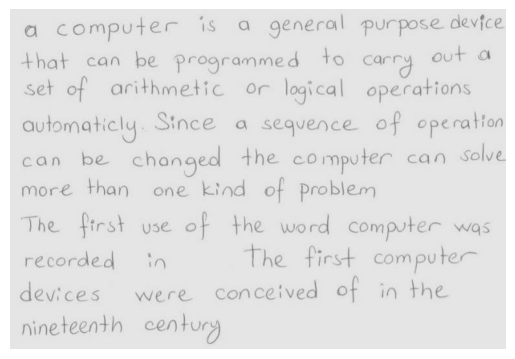

In [12]:
grey_img = cv2.imread('temp/grey.png')
plt.axis(False)
plt.imshow(grey_img)

In [13]:
thresh, im_bw = cv2.threshold(grey_img, 200, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite('temp/bw_image.png', im_bw)

True

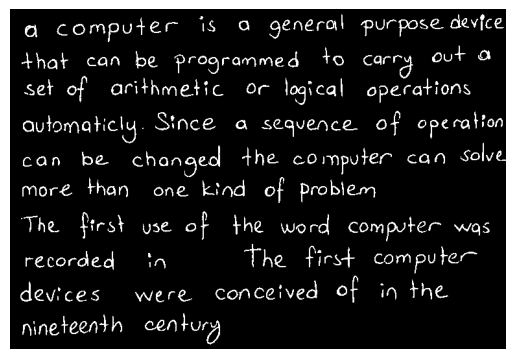

In [14]:
bw_image_file = 'temp/bw_image.png'
bw_img = cv2.imread(bw_image_file)
plt.axis(False)
plt.imshow(bw_img)

## 04: Noise Removal

In [15]:
#https://pyimagesearch.com/2021/04/28/opencv-morphological-operations/
#https://www.jeremymorgan.com/tutorials/opencv/dilate-opencv-python/
#https://www.jeremymorgan.com/tutorials/opencv/erosion-opencv-python/
#https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1) 
    kernel = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)  
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 1)
    return image

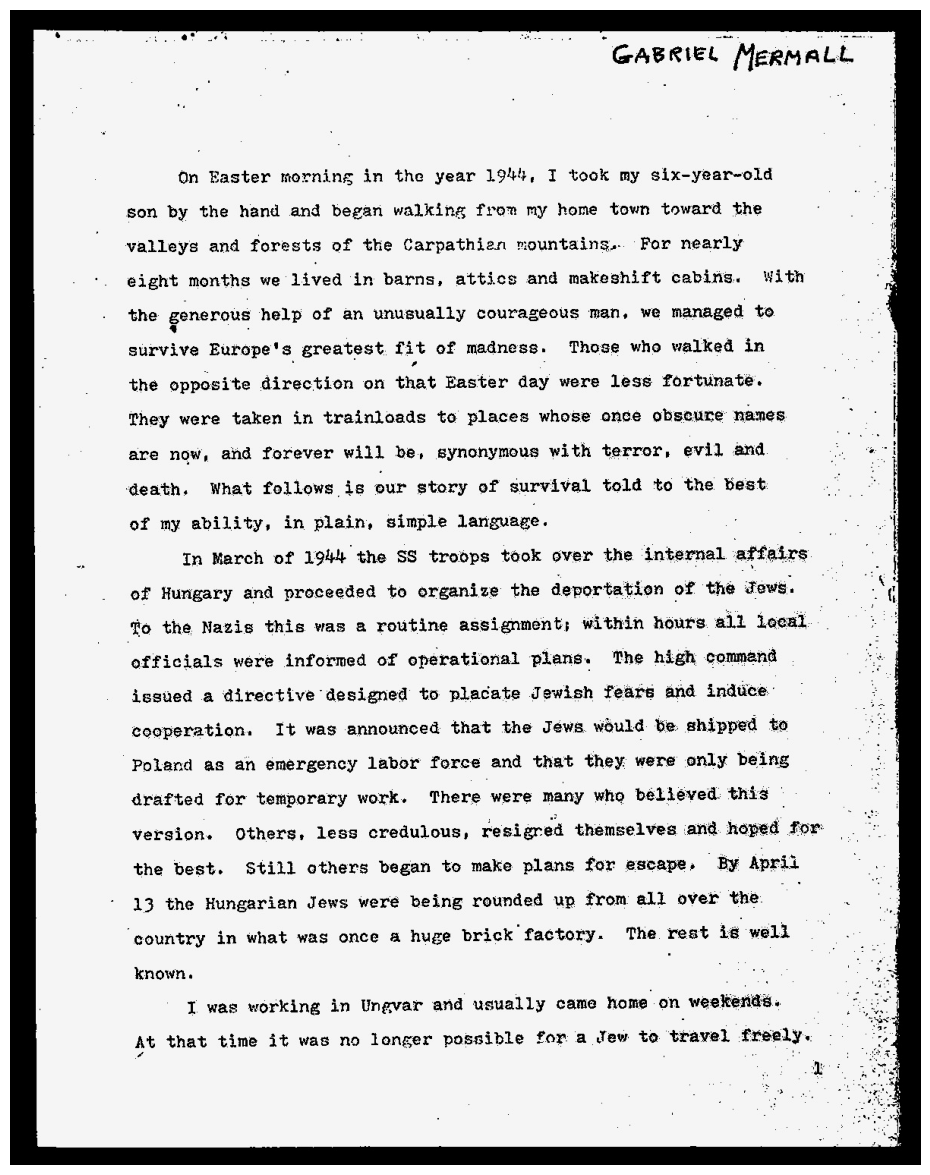

In [16]:
noisy_image_file = 'temp/bw_image.jpg'
display(noisy_image_file)


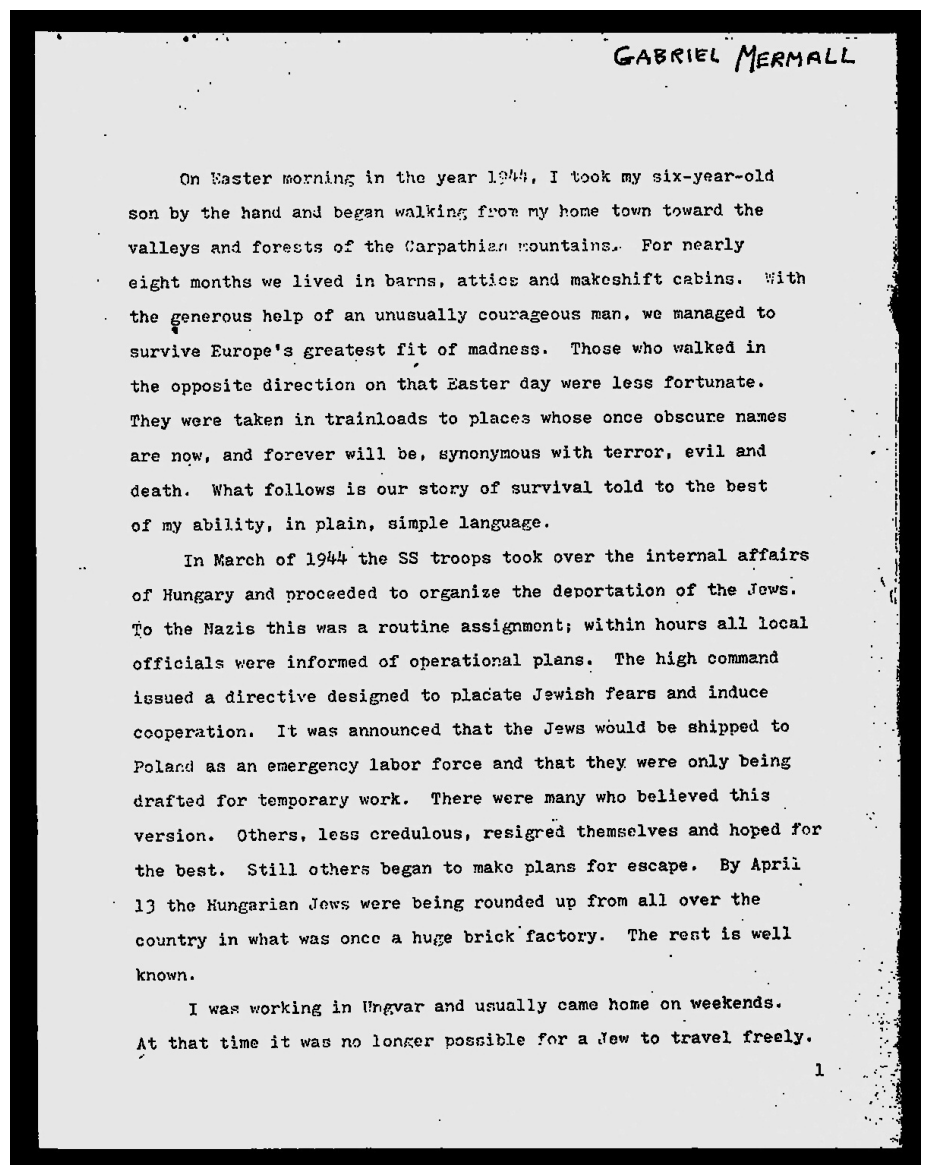

In [17]:
no_noise_img = cv2.imread('temp/no_noise.jpg')
display('temp/no_noise.jpg')


## 05: Dilation and Erosion

In [18]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return image

In [19]:
eroded_image = thin_font(no_noise_img)
cv2.imwrite('temp/eroded_image.jpg', eroded_image)

True

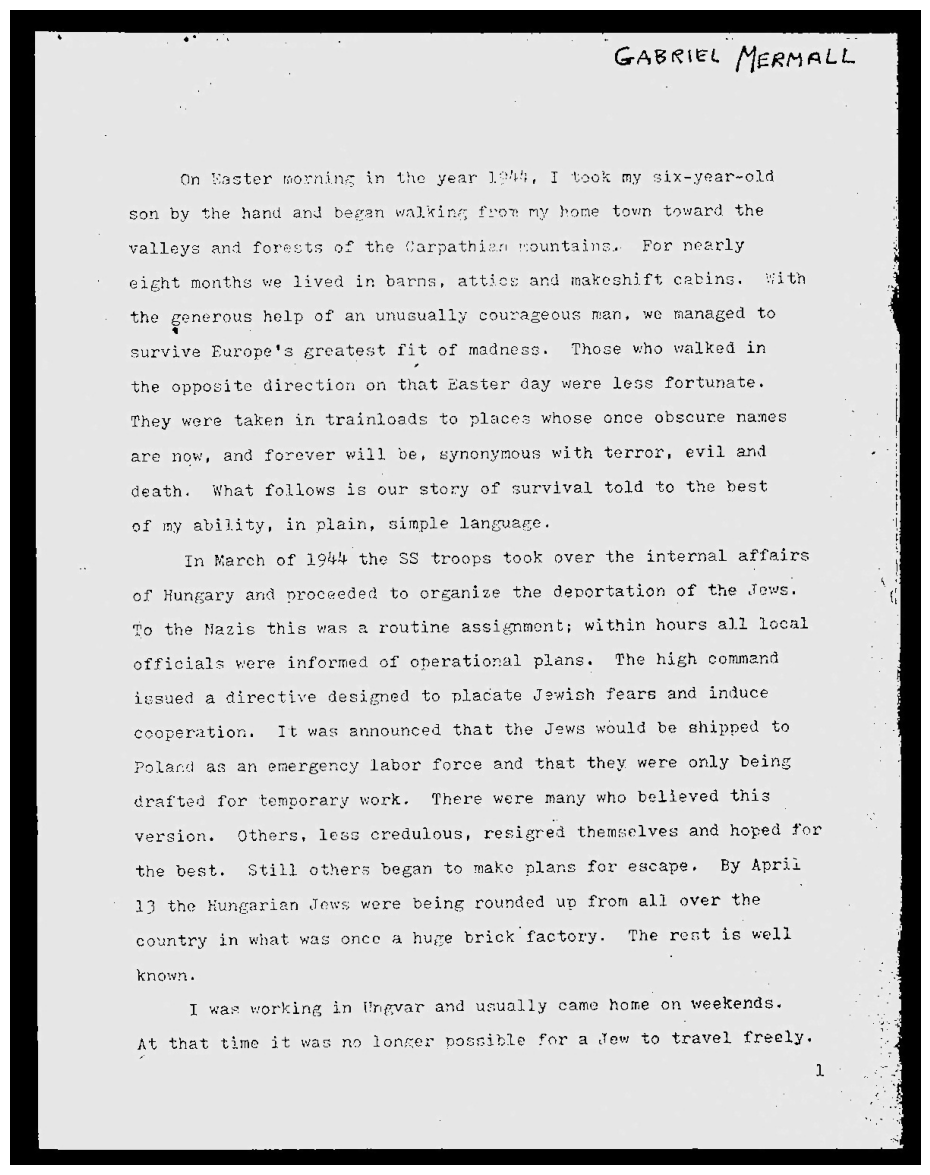

In [20]:
display('temp/eroded_image.jpg')

In [21]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return image

In [22]:
dialated_img = thick_font(no_noise_img)
cv2.imwrite('temp/dialated_image.jpg', dialated_img)

True

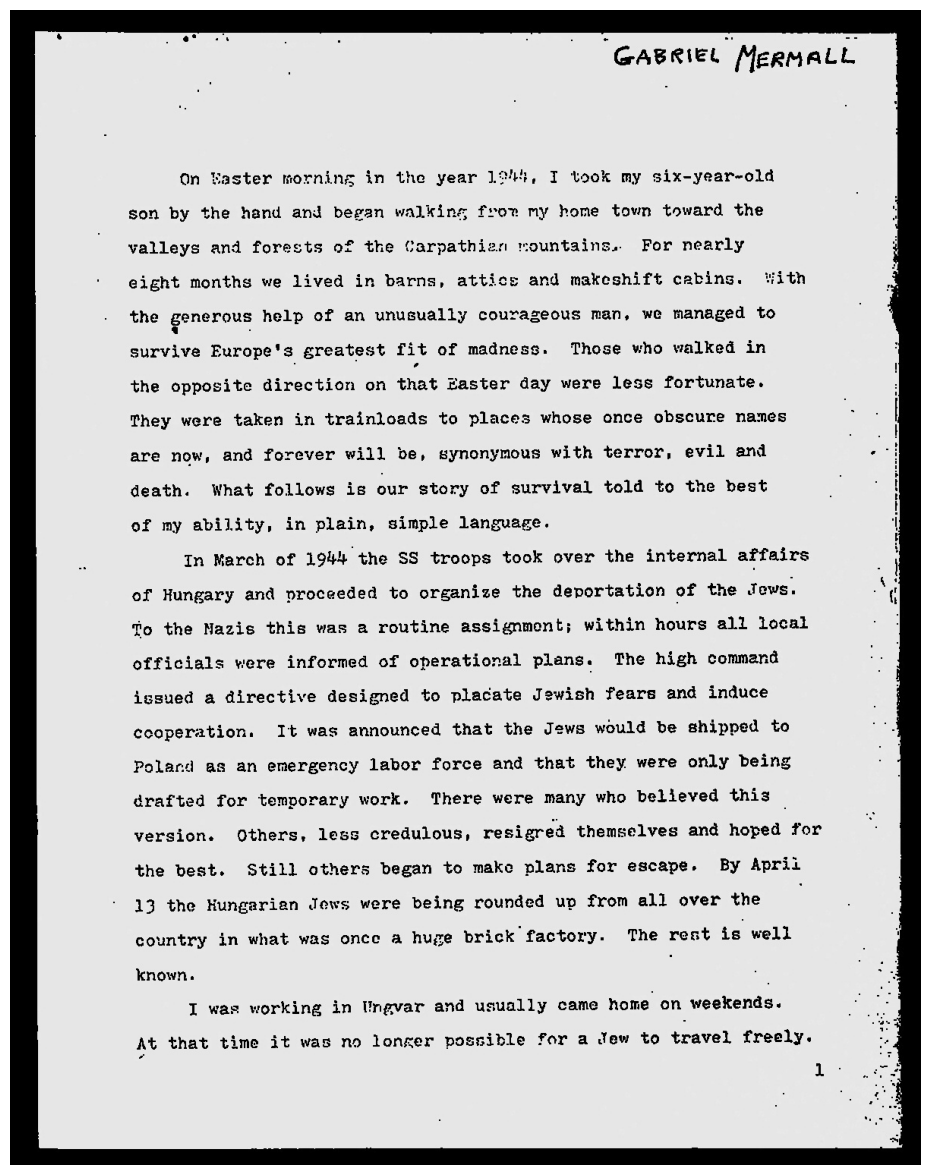

In [23]:
display('temp/dialated_image.jpg')

## 06: Rotation & Deskewing

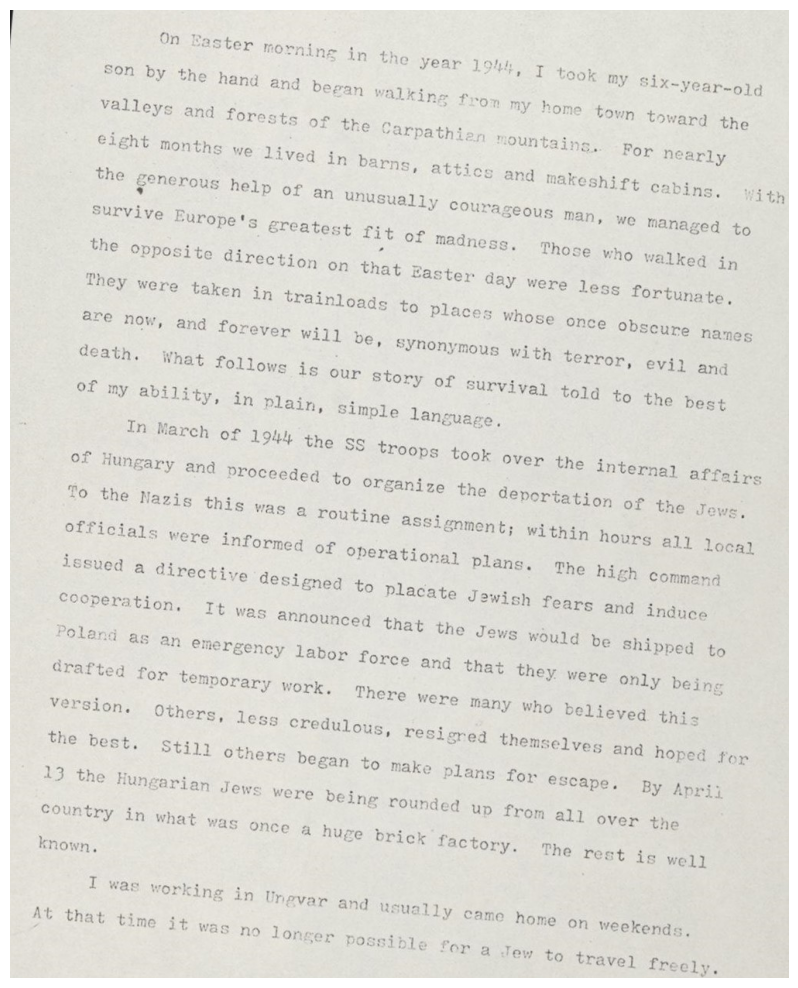

In [24]:
rotated_img_file = r'temp/page_01_rotated.JPG'
rotated_img = cv2.imread(rotated_img_file)
display(rotated_img_file)


In [25]:
def getSkewAngle(cvImage):
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    largestContour = contours[0]
    minAreaRect = cv2.minAreaRect(largestContour)

    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle

In [26]:
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    h, w = newImage.shape[:2]
    center = (w//2, h//2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage


In [27]:
# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

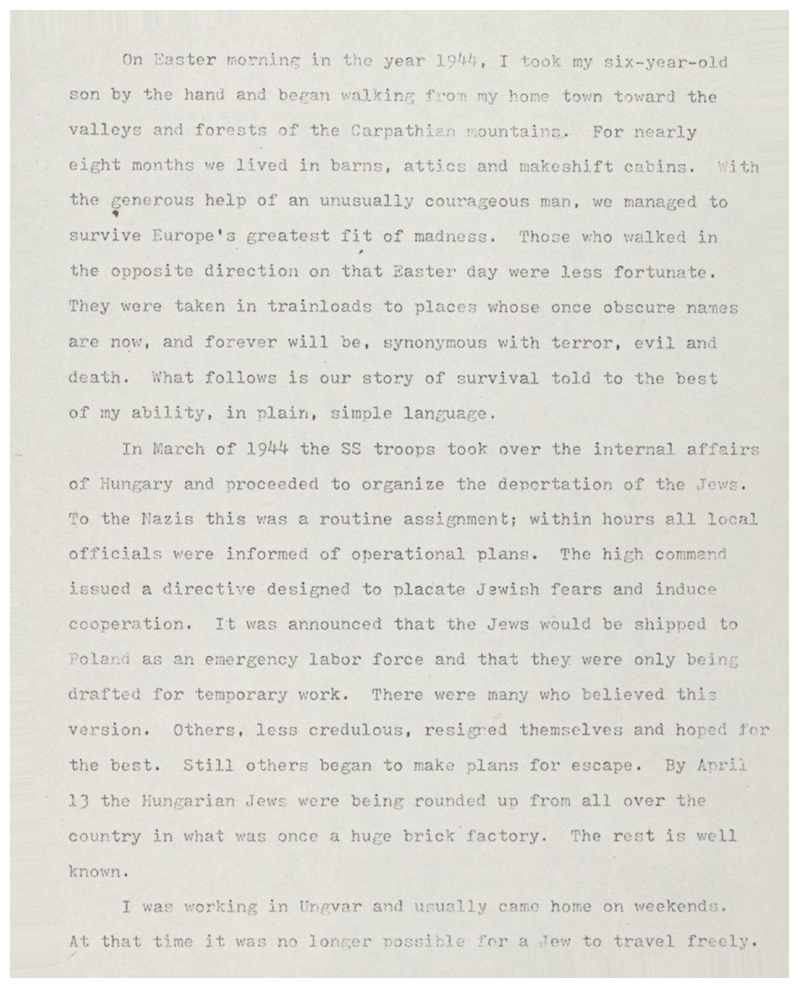

In [28]:
new = cv2.imread("temp/page_01_rotated.JPG")
fixed = deskew(new)
cv2.imwrite("temp/rotated_fixed.JPG", fixed)
display("temp/rotated_fixed.JPG")

## 07: Removing Borders

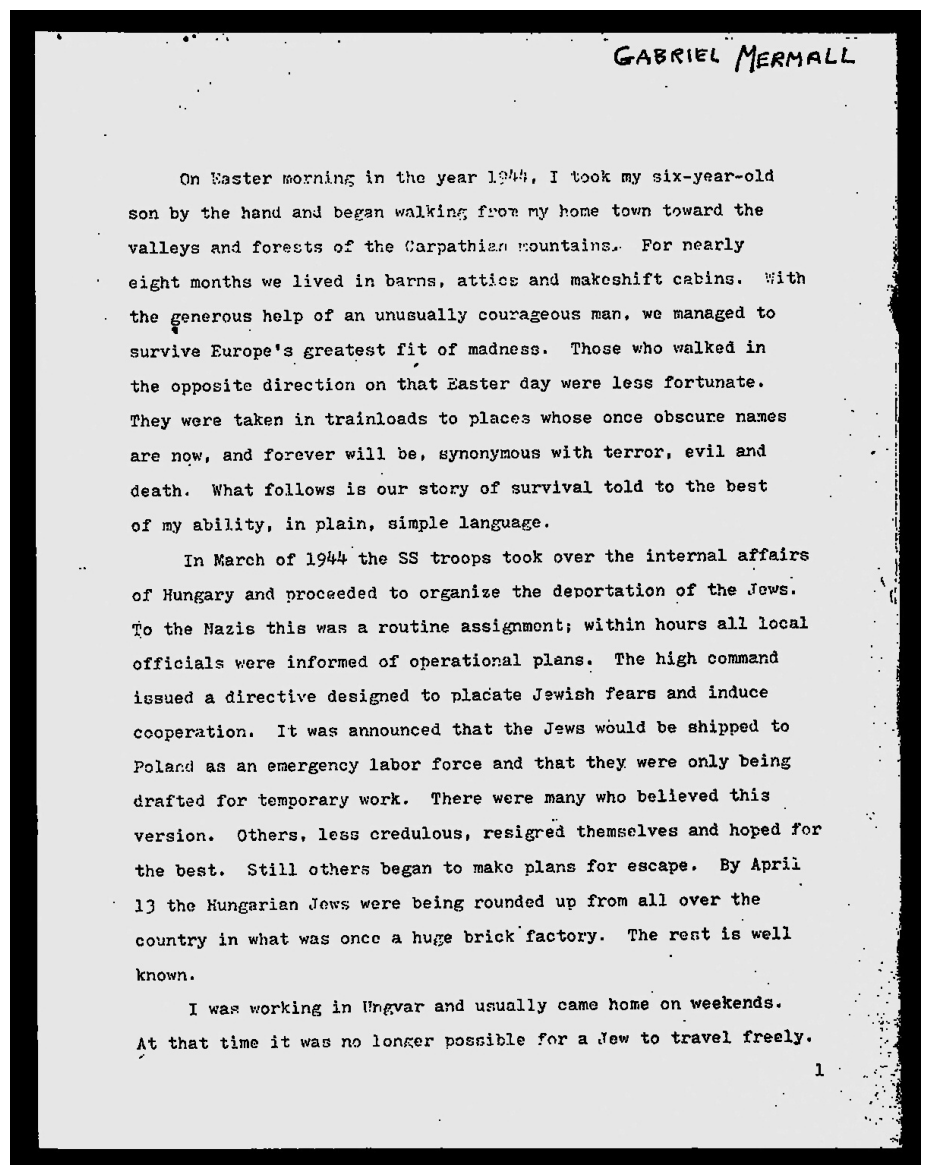

In [29]:
display('temp/no_noise.jpg')

In [30]:
def remove_borders(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    contours, heiarchy = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

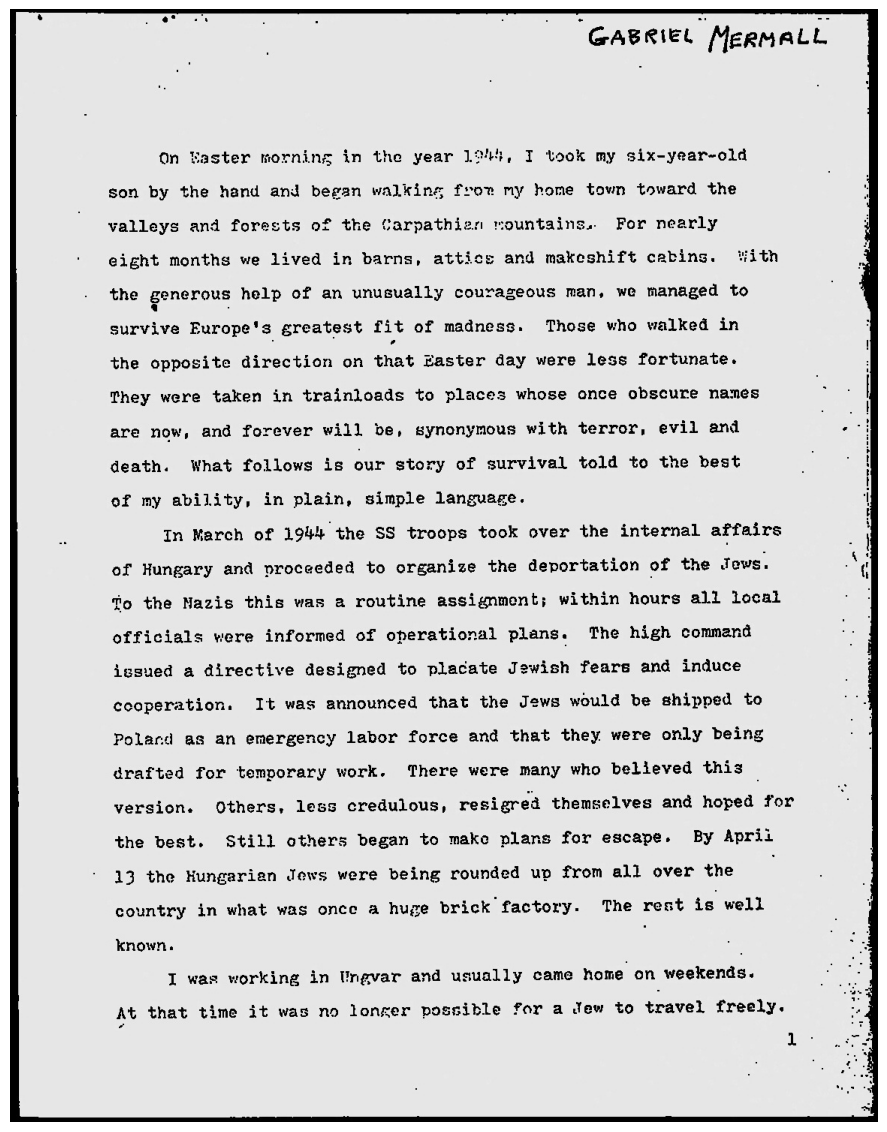

In [31]:
no_noise = cv2.imread('temp/no_noise.jpg')
no_borders = remove_borders(no_noise)
cv2.imwrite("temp/no_borders.jpg", no_borders)
display('temp/no_borders.jpg')

## 08: Missing Borders

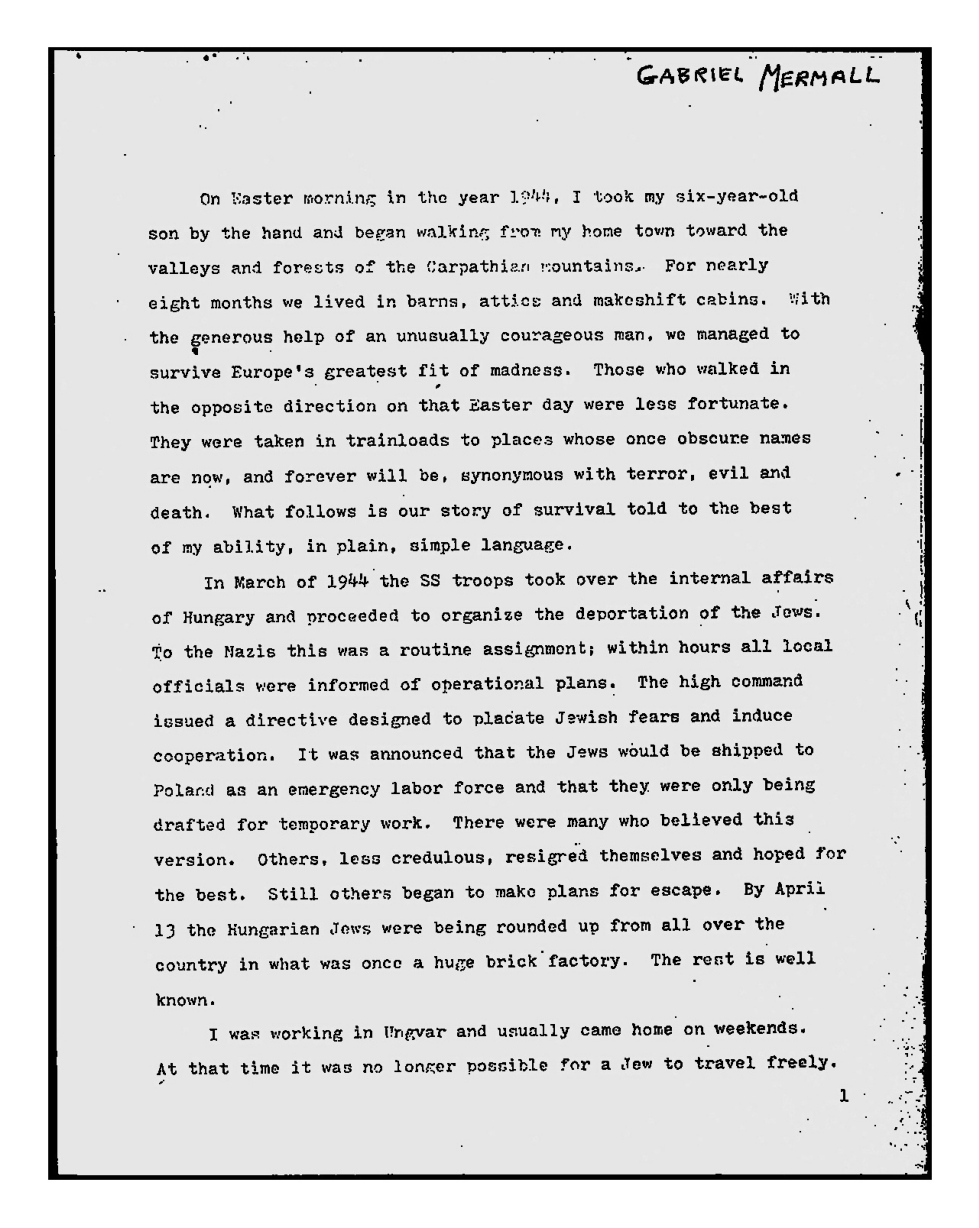

In [32]:

color = [255, 255, 255]
top, bottom, left, right = [50]*4

image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("temp/image_with_border.jpg", image_with_border)
display("temp/image_with_border.jpg")